# M5HW Assignment: P Burke
## Module 5 Assignment

Submit this code as a pull request back to GitHub Classroom by the date and time listed in Canvas.

For this assignment, use the dataset called `radar_parameters.csv` provided in the GitHub repository in the folder `homework`.

## Dataset Description

The training data consists of polarimetric radar parameters calculated from a disdrometer (an instrument that measures rain drop sizes, shapes, and rainfall rate) measurements from several years in Huntsville, Alabama. A model called `pytmatrix` is used to calculate polarimetric radar parameters from the droplet observations, which can be used as a way to compare what a remote sensing instrument would see and rainfall.

## Data columns

Features (radar measurements):

`Zh` - radar reflectivity factor (dBZ) - use the formula $dBZ = 10\log_{10}(Z)$

`Zdr` - differential reflectivity

`Ldr` - linear depolarization ratio

`Kdp` - specific differential phase

`Ah` - specific attenuation

`Adp` - differential attenuation

Target :

`R` - rain rate

## Assignment Tasks

**Task 1.** Split the data into a 70-30 split for training and testing data.

In [2]:
#import os
#import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression

#from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
#from sklearn.pipeline import make_pipeline
# #from sklearn.pipeline import Pipeline

#from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import PolynomialFeatures

ModuleNotFoundError: No module named 'sklearn'

In [3]:
df = pd.read_csv('./homework/radar_parameters.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18969 entries, 0 to 18968
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18969 non-null  int64  
 1   Zh (dBZ)        18969 non-null  float64
 2   Zdr (dB)        18969 non-null  float64
 3   Ldr (dB)        18969 non-null  float64
 4   Kdp (deg km-1)  18969 non-null  float64
 5   Ah (dBZ/km)     18969 non-null  float64
 6   Adr (dB/km)     18969 non-null  float64
 7   R (mm/hr)       18969 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.2 MB


In [5]:
df.describe()

,Unnamed: 0,Zh (dBZ),Zdr (dB),Ldr (dB),Kdp (deg km-1),Ah (dBZ/km),Adr (dB/km),R (mm/hr)
count,18969.000000,18969.000000,18969.000000,18969.000000,18969.000000,18969.000000,18969.000000,18969.000000
mean,9484.000000,31.294021,0.762979,-37.969272,0.080879,0.001829,0.000234,7.855561
std,5476.022964,6.496330,0.363489,3.277391,0.221018,0.003469,0.000822,8.569413
min,0.000000,14.036426,0.285207,-44.849249,0.000697,0.000044,0.000002,0.309399
25%,4742.000000,26.720145,0.489184,-40.573505,0.011537,0.000482,0.000027,3.072614
50%,9484.000000,31.020280,0.677804,-38.113140,0.028640,0.000977,0.000069,5.622457
75%,14226.000000,35.597165,0.947020,-35.601404,0.073099,0.001970,0.000182,9.622175
max,18968.000000,57.400639,3.843941,-25.373718,5.060710,0.082511,0.027538,195.557062


c:\Users\pburke\AppData\Local\R-MINI~1\envs\py3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


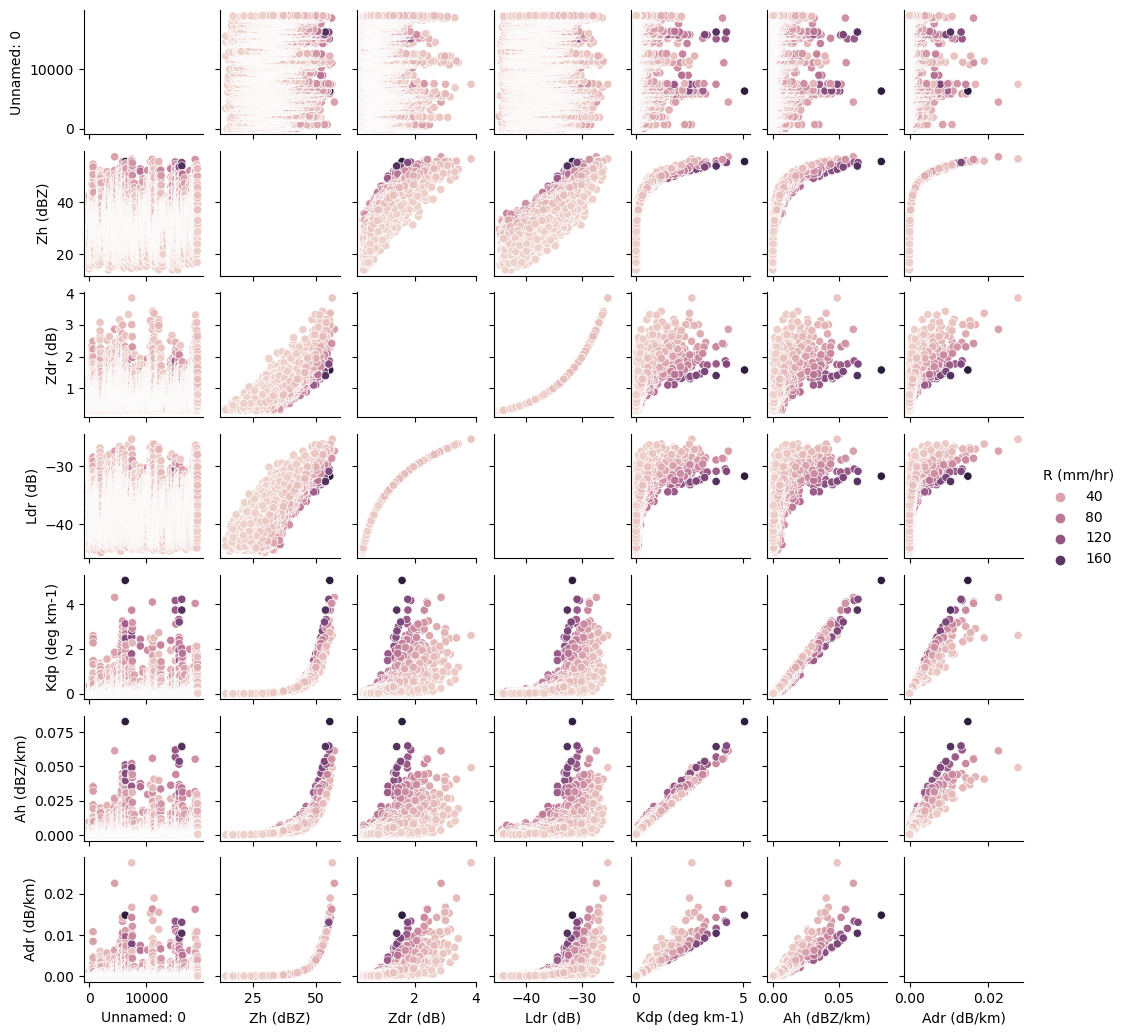

In [6]:
%matplotlib inline
#import seaborn as sns; sns.set()
#sns.pairplot(iris, hue='petal_width', size=1.5);
sns.pairplot(df, hue='R (mm/hr)', size=1.5);

In [7]:
# Create feature dataframe

df_X = df.drop('R (mm/hr)', axis=1)
df_X.shape

(18969, 7)

In [8]:
# Create target dataframe

df_y = df['R (mm/hr)']
df_y.shape

(18969,)

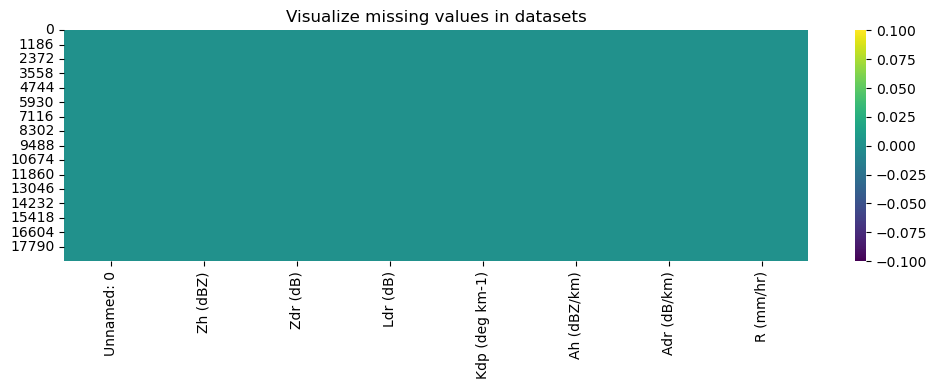

In [9]:
# Check for missing values

plt.figure(figsize=(12, 3))
sns.heatmap(df.isnull(), cmap='viridis');
plt.title('Visualize missing values in datasets');

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

**Task 2.** Using the split created in Task 1, train a multiple linear regression dataset using the training dataset, and validate it using the testing dataset. 

_Note:_ Not sure if there is another model class in `sklearn` that is more relevant to mlr.

In [11]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression()

In [12]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     1.9601211025173522e-06
Model intercept: -29.23405142504312


_Note:_ In order to confirm choice of model and hyperparameters are correct, we need a way to *validate* that our model and our hyperparameters are a good fit to the data.
While this may sound simple, there are some pitfalls that you must avoid to do this effectively.  
`accuracy_score()` didn't work, as that is designed for classification tasks not continuous data. Instead I use `sklearn.metrics::r2_score`

In [13]:
y_test_model = model.predict(X_test)

In [15]:
from sklearn import metrics

print('Coeffecient of determination (R\N{SUPERSCRIPT TWO}): {}'.format(metrics.r2_score(y_test, y_test_model)))

Coeffecient of determination (R²): 0.989104571558249


Ok, try another approach: cross-validation

In [18]:
y2_model = model.fit(X_test, y_test).predict(X_train)
y1_model = model.fit(X_train, y_train).predict(X_test)

print('Coeffecient of determination -- test (R\N{SUPERSCRIPT TWO}): {}'.format(metrics.r2_score(y_test, y1_model)))
print('Coeffecient of determination -- train (R\N{SUPERSCRIPT TWO}): {}'.format(metrics.r2_score(y_train, y2_model)))

Coeffecient of determination -- test (R²): 0.989104571558249
Coeffecient of determination -- train (R²): 0.9853727718017462


Now: compare the $R^2$ and root mean square errors of model on the training and testing sets to a baseline prediction of rain rate using the formula $Z = 200 R^{1.6}$.

In [19]:
r2 = metrics.r2_score(y_test, y1_model), metrics.r2_score(y_train, y2_model)
rmse = metrics.mean_squared_error(y_test, y1_model), metrics.mean_squared_error(y_train, y2_model)

In [31]:
#Z = 1
df['r_pred'] = (df['Zh (dBZ)']/200)**(8/5)
df

,Unnamed: 0,Zh (dBZ),Zdr (dB),Ldr (dB),Kdp (deg km-1),Ah (dBZ/km),Adr (dB/km),R (mm/hr),r_pred
0,0,23.144878,0.418637,-41.757733,0.005395,0.000290,0.000012,2.393520,0.031731
1,1,22.737156,0.322850,-43.772069,0.005194,0.000360,0.000012,3.502699,0.030841
2,2,26.869826,0.330948,-43.577399,0.013385,0.000903,0.000030,8.627561,0.040288
3,3,28.540561,0.399480,-42.139731,0.018872,0.001036,0.000043,8.424447,0.044370
4,4,30.500127,0.543758,-39.763087,0.027438,0.001157,0.000064,8.189291,0.049344
...,...,...,...,...,...,...,...,...,...
18964,18964,31.515997,0.579955,-39.244229,0.034048,0.001417,0.000080,10.648020,0.052000
18965,18965,29.993334,0.567935,-39.399188,0.024134,0.001032,0.000057,7.981875,0.048039
18966,18966,31.685913,0.655681,-38.375696,0.033971,0.001165,0.000081,6.822691,0.052449
18967,18967,32.980096,0.768586,-37.166218,0.043117,0.001285,0.000105,6.801169,0.055918


**Task 3.** Repeat Task 1 doing a grid search over polynomial orders, using a grid search over orders 0-21, and use cross-validation of 7 folds.  For the best polynomial model in terms of $R^2$, does it outperform the baseline and the linear regression model in terms of $R^2$ and root mean square error?

In [36]:
#X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)


from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [37]:
grid.fit(X_train,y_train);

c:\Users\pburke\AppData\Local\R-MINI~1\envs\py3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\pburke\AppData\Local\R-MINI~1\envs\py3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from 

In [ ]:
grid.best_params_

In [3]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

NameError: name 'grid' is not defined

**Task 4** Repeat Task 1 with a Random Forest Regressor, and perform a grid_search on the following parameters:
   
   ```python
   {'bootstrap': [True, False],  
   'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],  
   'max_features': ['auto', 'sqrt'],  
   'min_samples_leaf': [1, 2, 4],  
   'min_samples_split': [2, 5, 10],  
   'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
   ```
  Can you beat the baseline, or the linear regression, or best polynomial model with the best optimized Random Forest Regressor in terms of $R^2$ and root mean square error?

In [ ]:
from sklearn.ensemble import RandomForestRegressor


param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=7)